<a href="https://colab.research.google.com/github/MatthewAlanHaworth/Thinkful-Projects-Capstone-III/blob/main/Thinkful_%7C_Capstone_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <p style="font-size:36px; font-family:'Candara'; font-weight: bold; line-height:1.3">Hypothesis Testing of Health Insurance Data</p>

<p style="font-size:24px; font-family:'Candara'; font-weight: bold; line-height:1.3">Notebook Description</p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The focus of this notebook is to describe the procedure for performing hypothesis testing and statistical analysis of a complex dataset, like the data contained in the Health Insurance dataset, described below.</p>
<p style="font-size:24px; font-family:'Calibri Light'; font-weight:bold;">Description of the Data:</p>
<ul>
    <li><p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;"><b>Age</b> - This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;"><b>Sex</b> - This is the policy holder's gender, either male or female.</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;"><b>BMI</b> - This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;"><b>Children</b> - This is an integer indicating the number of children / dependents covered by the insurance plan.</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;"><b>Smoker</b> - This is yes or no depending on whether the insured regularly smokes tobacco.</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light';"><b>Region</b> - This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;"><b>Charges</b> - Individual medical costs billed to health insurance.</p></li>
</ul>
<p style="font-size:24px; font-family:'Candara'; font-weight: bold; line-height:1.3">Key Activities:</p>
    <ul>
        <li><p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3">Explore the dataset and extract insights using Exploratory Data Analysis.</p></li> 
        <li><p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3">Prove statistically whether or not the medical claims made by people who smoke are greater than those who do not.</p></li>
        <li><p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3">Prove statistically whether the BMI of females is different from that of males.</p></li>
        <li><p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3">Prove statistically whether or not the proportion of smokers is significantly different across regions.</p></li>
        <li><p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3">Prove statistically whether the mean BMI of women with no children, one child, and two children the same.</p></li>
    </ul>

In [ ]:
#import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics as stats2
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#configure jupyter to allow each cell to display multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# import dataset
axis = pd.read_csv('https://raw.githubusercontent.com/mah26870/Thinkful-Capstone-III/main/Health_insurance.csv')
axis.sample(10)

,age,sex,bmi,children,smoker,region,charges
966,51,male,24.795,2,yes,northwest,23967.38305
122,20,female,28.975,0,no,northwest,2257.47525
1222,50,male,25.300,0,no,southeast,8442.66700
194,18,male,34.430,0,no,southeast,1137.46970
213,34,female,26.730,1,no,southeast,5002.78270
128,32,female,17.765,2,yes,northwest,32734.18630
539,53,male,31.350,0,no,southeast,27346.04207
887,36,female,30.020,0,no,northwest,5272.17580
955,31,male,39.490,1,no,southeast,3875.73410
630,53,male,36.100,1,no,southwest,10085.84600


# <p style="font-size:24px; font-family:'Candara'; font-weight: bold; line-height:1.3">Exploratory Data Analysis</p>

<p style="font-size:18px; font-family:'Calibri Light'; font-weight:bold;">Investigate Nulls and Duplicated Records:</p>

In [ ]:
#copy dataset
dat = axis.copy()

#check for null values
print('Null values in dataset:\n\n{}\n\n'.format(dat.isna().value_counts()))

#check for duplicated values
print('Appear to be duplicated records (?):\n\n{}\n\n'.format(dat.duplicated().value_counts()))

#investigate reported duplicated value
print('Records that appear to be duplicated:\n\n{}\n\n'.format(dat.loc[dat.duplicated() == True,:]))
print('Records with bmi = 30.59\n\n{}\n\n'.format(dat.loc[dat['bmi'] == 30.59,:]))
print('Records with charges = 1639.5631:\n\n{}\n\n'.format(dat.loc[dat['charges'] == 1639.5631,:]))
print('Records with bmi = 30.59 and charges = 1639.5631:\n\n{}\n\n'.format(dat.loc[np.logical_and(dat['bmi'] == 30.59, dat['charges'] == 1639.5631),:]))

#Although it appears that the records are duplicated, there is nothing concrete in the records to jusify exclusion

Null values in dataset:

age    sex    bmi    children  smoker  region  charges
False  False  False  False     False   False   False      1338
dtype: int64


Appear to be duplicated records (?):

False    1337
True        1
dtype: int64


Records that appear to be duplicated:

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


Records with bmi = 30.59

      age     sex    bmi  children smoker     region      charges
195    19    male  30.59         0     no  northwest   1639.56310
423    25    male  30.59         0     no  northeast   2727.39510
526    19  female  30.59         2     no  northwest  24059.68019
567    41    male  30.59         2     no  northwest   7256.72310
581    19    male  30.59         0     no  northwest   1639.56310
983    27  female  30.59         1     no  northeast  16796.41194
1158   20  female  30.59         0     no  northeast   2459.72010


Records with charges = 1639.5631:

     ag

<p style="font-size:18px; font-family:'Calibri Light'; font-weight:bold;">Observation:</p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Although it appears that record 195 and record 581 are duplicates, there is nothing concrete in the records to sufficiently justify the conclusion that they are in fact duplicates. Therefore, the records will remain untouched and the analysis will continue forward.</p>

<p style="font-size:18px; font-family:'Calibri Light'; font-weight:bold;">Look at the structure of the dataset in general:</p>

In [ ]:
#look at dataset info
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<p style="font-size:18px; font-family:'Calibri Light'; font-weight:bold;">Observation:</p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;There are 7 features and 1338 entires, all non-null. Age, BMI, Children, and Charges are numerical features, and of them, Children is a numerical categorical feature. Sex (or more appropriately, Gender), Smoker, and Region, are all string categorical features.</p>

In [ ]:
#look at spread of numerical data
dat.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<p style="font-size:18px; font-family:'Calibri Light'; font-weight:bold;">Observation:</p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The above table describes the numerical data in detail, and speaks for itself. This is for reference and will be expanded on visually going forward.</p>

In [ ]:
#create counts of data for plotting categorical variables
gender = np.unique(dat['sex'], return_counts=True)
smoker = np.unique(dat['smoker'], return_counts=True)
region = np.unique(dat['region'], return_counts=True)
print('gender = {}\n'.format(gender))
print('smoker = {}\n'.format(smoker))
print('region = {}\n'.format(region))

gender = (array(['female', 'male'], dtype=object), array([662, 676]))

smoker = (array(['no', 'yes'], dtype=object), array([1064,  274]))

region = (array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object), array([324, 325, 364, 325]))



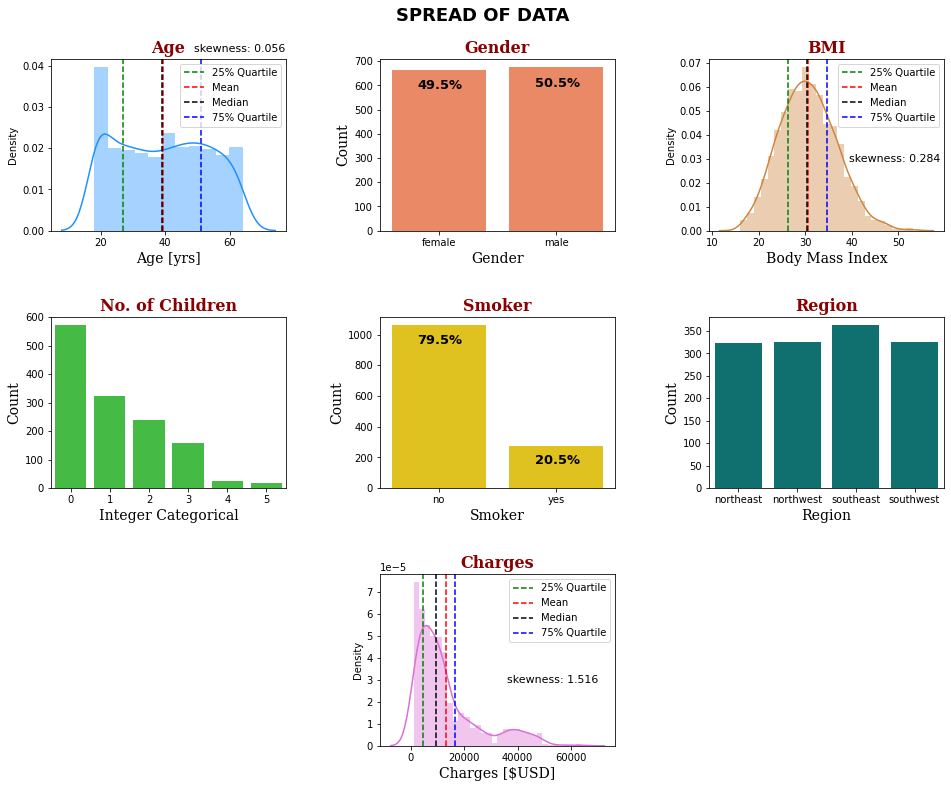

In [ ]:
# create fontdicts for formatting figure text
axtitle_dict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 16
        }

axlab_dict = {'family': 'serif',
              'color': 'black',
              'size': 14
              }

#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12]);
fig.suptitle("SPREAD OF DATA", fontsize=18, fontweight='bold');
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);

#load plots into subplots, and set plot parameters
ax0 = fig.add_subplot(3, 3, 1);
sns.distplot(dat['age'], ax=ax0, color='dodgerblue');
ax0.axvline(dat['age'].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile');
ax0.axvline(dat['age'].mean(),color='red',linestyle='--',label='Mean');
ax0.axvline(dat['age'].median(),color='black',linestyle='--',label='Median');
ax0.axvline(dat['age'].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile');
ax0.text(77, 0.044, 'skewness: {}' .format(str(round(dat['age'].skew(),3))), ha='right', va='center', size=11)
ax0.set_title('Age', fontdict=axtitle_dict);
ax0.set_xlabel('Age [yrs]', fontdict=axlab_dict);
ax0.legend(fontsize=10);

ax1 = fig.add_subplot(3, 3, 2);
sns.barplot(x=list(gender[0]), y=list(gender[1]), ax=ax1, color='coral');
ax1.text(0.2, 600, '{}%' .format(str(round(gender[1][0]/sum(gender[1])*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
ax1.text(1.2, 610, '{}%' .format(str(round(gender[1][1]/sum(gender[1])*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
ax1.set_title('Gender', fontdict=axtitle_dict);
ax1.set_xlabel('Gender', fontdict=axlab_dict);
ax1.set_ylabel('Count', fontdict=axlab_dict);

ax2 = fig.add_subplot(3, 3, 3);
sns.distplot(dat['bmi'], ax=ax2, color='peru');
ax2.axvline(dat['bmi'].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile');
ax2.axvline(dat['bmi'].mean(),color='red',linestyle='--',label='Mean');
ax2.axvline(dat['bmi'].median(),color='black',linestyle='--',label='Median');
ax2.axvline(dat['bmi'].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile');
ax2.text(59, 0.03, 'skewness: {}' .format(str(round(dat['bmi'].skew(),3))), ha='right', va='center', size=11)
ax2.set_title('BMI', fontdict=axtitle_dict);
ax2.set_xlabel('Body Mass Index', fontdict=axlab_dict);
ax2.legend(fontsize=10);

ax3 = fig.add_subplot(3, 3, 4);
sns.countplot(dat['children'], ax=ax3, color='limegreen');
ax3.set_title('No. of Children', fontdict=axtitle_dict);
ax3.set_xlabel('Integer Categorical', fontdict=axlab_dict);
ax3.set_ylabel('Count', fontdict=axlab_dict);

ax4 = fig.add_subplot(3, 3, 5);
sns.barplot(x=list(smoker[0]), y=list(smoker[1]), ax=ax4, color='gold');
ax4.text(0.2, 960, '{}%' .format(str(round(smoker[1][0]/sum(smoker[1])*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
ax4.text(1.2, 180, '{}%' .format(str(round(smoker[1][1]/sum(smoker[1])*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
ax4.set_title('Smoker', fontdict=axtitle_dict);
ax4.set_xlabel('Smoker', fontdict=axlab_dict);
ax4.set_ylabel('Count', fontdict=axlab_dict);

ax5 = fig.add_subplot(3, 3, 6);
sns.barplot(x=list(region[0]), y=list(region[1]), ax=ax5, color='teal');
ax5.set_title('Region', fontdict=axtitle_dict);
ax5.set_xlabel('Region', fontdict=axlab_dict);
ax5.set_ylabel('Count', fontdict=axlab_dict);

ax6 = fig.add_subplot(3, 3, 8)
sns.distplot(dat['charges'], ax=ax6, color='orchid');
ax6.axvline(dat['charges'].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile');
ax6.axvline(dat['charges'].mean(),color='red',linestyle='--',label='Mean');
ax6.axvline(dat['charges'].median(),color='black',linestyle='--',label='Median');
ax6.axvline(dat['charges'].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile');
ax6.text(70000, 3e-5, 'skewness: {}' .format(str(round(dat['charges'].skew(),3))), ha='right', va='center', size=11)
ax6.set_title('Charges', fontdict=axtitle_dict);
ax6.set_xlabel('Charges [$USD]', fontdict=axlab_dict);
ax6.legend(fontsize=10);

<p style="font-size:18px; font-family:'Calibri Light'; font-weight:bold;">Observation:</p>
<ul>
    <li><p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3">The age feature appears to be non-skewed but platykurtic, deviating from a normal distrubtion.</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3">Gender appears to have a near 50/50 spread as would be expected.</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3">BMI appears to be normally distributed (both non-skewed and mesokurtic).</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3">Number of children appears to be reasonably spread.</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3">A majority of the population are non-smokers, with about 20% smokers.</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3">There is a close to even spread of records across regions.</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3">Charges appear to be heavily positively skewed, deviating from a normal distribution.</p></li>
</ul>

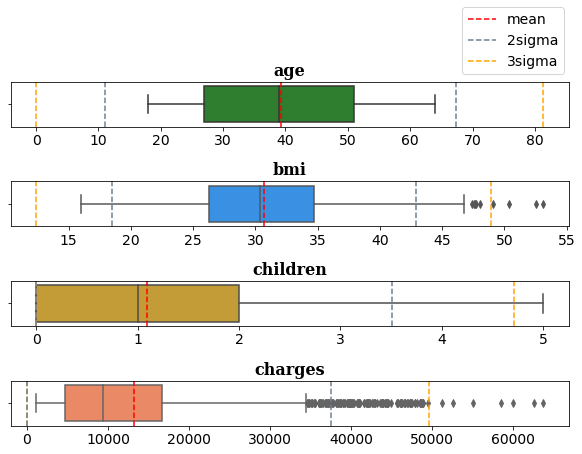

In [ ]:
#create fontdict for axis labels
axlab2 = {'family': 'serif',
              'color': 'black',
              'weight': 'bold',
              'size': 16
         }
#create subplot layout
fig = plt.figure(figsize=[10,10]);
grid = plt.GridSpec(6, 1, wspace=0.3, hspace=1.2);
x = ['age', 'bmi', 'children', 'charges'];
col = ['forestgreen','dodgerblue','goldenrod', 'coral'];

#loop to populate boxplots within subplots
for i in np.arange(0,4):
    for j in np.arange(0,1): 
        exec(f'ax{i}{j} = plt.subplot(grid[i,j]);')
        exec(f'sns.boxplot(x=dat[x[{i}]], ax=ax{i}{j}, color=col[{i}]);')
        exec(f'ax{i}{j}.set_title(x[{i}], fontdict=axlab2);')
        exec(f'ax{i}{j}.set_xlabel("", fontdict=axlab2);')
        exec(f'a{i} = ax{i}{j}.axvline(dat[x[{i}]].mean(),color= "red", linestyle="--", label="mean")')
        exec(f'b{i} = ax{i}{j}.axvline(dat[x[{i}]].mean()+ 3 * dat[x[{i}]].std(),color= "orange", linestyle="--", label="3sigma")')
        exec(f'ax{i}{j}.axvline(max([dat[x[{i}]].mean()- 3 * dat[x[{i}]].std(), 0]),color= "orange", linestyle="--")')
        exec(f'c{i} = ax{i}{j}.axvline(dat[x[{i}]].mean()+ 2 * dat[x[{i}]].std(),color= "slategrey", linestyle="--", label="2sigma")')
        exec(f'ax{i}{j}.axvline(max([dat[x[{i}]].mean()- 2 * dat[x[{i}]].std(), 0]),color= "slategrey", linestyle="--")')
        plt.xticks(fontsize=14);

plt.legend([a0, c0, b0], ['mean','2sigma','3sigma'], loc='upper center', bbox_to_anchor=(0.9, 9.4), fontsize=14)        
fig.show();

<p style="font-size:18px; font-family:'Calibri Light'; font-weight:bold;">Observation:</p>
<ul>
    <li><p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3">Mean age of claimants is approximately 39 years old and all adults, from the age of 16 to 64 years old.</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3">The mean BMI of claimants is obese (>30) and the IQR falls between overweight and obese. Outliers appear in the high end of extreme obesity.</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3">Median population of claimants has one child and IQR is between 0 to 2 children. There does not appear to be any outliers in this distribution.</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3">Mean claim payment is about \$13000, with IQR between approximately \$5000 to \$17000. There are some outliers in the higher amount claims.</p></li>
</ul>

In [ ]:
#create dummies of categorical features so that correlation may be analyzed
dum_dat= pd.get_dummies(dat, prefix='Gen', columns=['sex'])
dum_dat= pd.get_dummies(dum_dat, prefix='Smok', columns=['smoker'])
dum_dat= pd.get_dummies(dum_dat, prefix='Reg', columns=['region'])
dum_dat.head(10)

,age,bmi,children,charges,Gen_female,Gen_male,Smok_no,Smok_yes,Reg_northeast,Reg_northwest,Reg_southeast,Reg_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
5,31,25.740,0,3756.62160,1,0,1,0,0,0,1,0
6,46,33.440,1,8240.58960,1,0,1,0,0,0,1,0
7,37,27.740,3,7281.50560,1,0,1,0,0,1,0,0
8,37,29.830,2,6406.41070,0,1,1,0,1,0,0,0
9,60,25.840,0,28923.13692,1,0,1,0,0,1,0,0


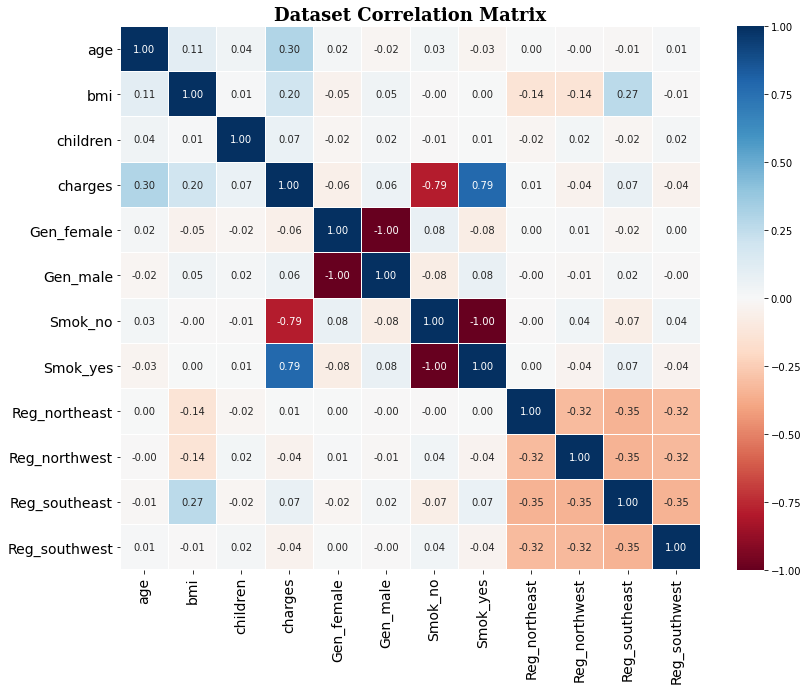

In [ ]:
#plot correlation matrix heatmap
fig, ax = plt.subplots(figsize=[13,10])
sns.heatmap(dum_dat.corr(), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap="RdBu")
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix', fontdict={'family': 'serif', 'color': 'black', 'size': 18, 'weight': 'bold'})
fig.show();

In [ ]:
#find which features have significant correlation (-0.5 < coef. > 0.5) 
blah = np.logical_or(dum_dat.corr()>0.5, dum_dat.corr()<-0.5)

#disregard identity
for i in np.arange(0,len(blah)):
    blah.iloc[i,i] = False

#create table of correlation relationships by index values
corr_val = []
for i in np.arange(0,len(blah.iloc[0,:])):
    for j in np.arange(0,len(blah.iloc[:,0])):
        if blah.iloc[i,j] == True:
            corr_val.append([blah.index.values[j], blah.columns.values[i]])

#drop rows in table in which relationships are duplicated in table (x vs. y and y vs. x)            
x = []
for i in np.arange(0,len(corr_val)):
    x.append(str(i))
corr_val = pd.DataFrame(corr_val, columns=["",""], index=x)
del blah, x
for i in corr_val.index:
    for j in corr_val.index:
        if any(corr_val.index == i) == True:
            a, b = corr_val.loc[i]
            if i != j:
                if np.logical_and((corr_val.loc[j][0] == b) == True, (corr_val.loc[j][1] == a) == True) == True:
                    corr_val.drop(j, inplace=True);
corr_val.reset_index(drop=True, inplace=True)

print('The following features in the data are significantly correlated (-0.5 < coef. > 0.5):\n {}' .format(corr_val))

The following features in the data are significantly correlated (-0.5 < coef. > 0.5):
                        
0   Smok_no     charges
1  Smok_yes     charges
2  Gen_male  Gen_female
3  Smok_yes     Smok_no


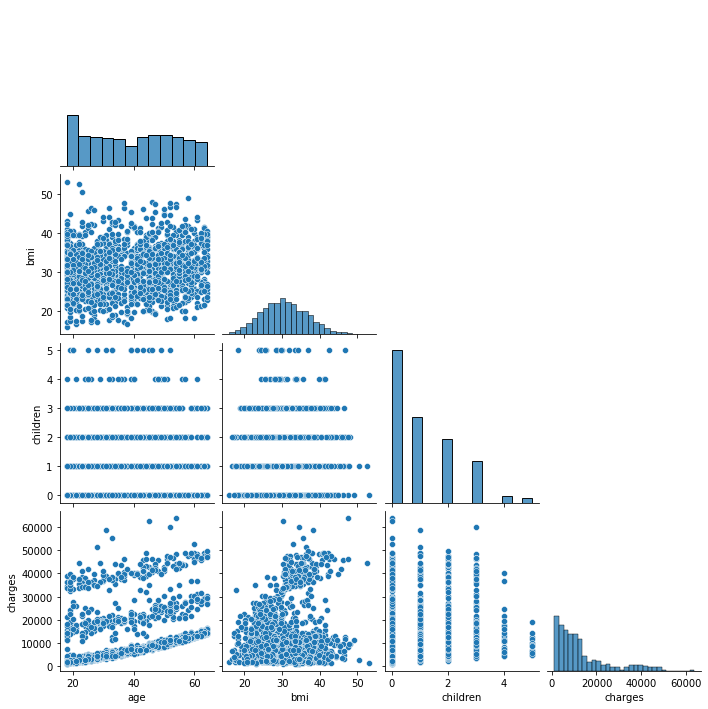

In [ ]:
sns.pairplot(dat, corner=True);

<p style="font-size:18px; font-family:'Calibri Light'; font-weight:bold;">Observation:</p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;There appears to be some interesting phenomena going in betewen Charges & Age and Charges & BMI that will be investigated further.</p> 

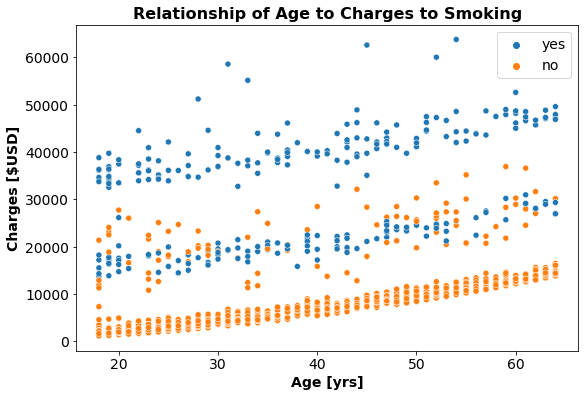

In [ ]:
fig1 = plt.figure(figsize=[9,6]);
ax0 = sns.scatterplot(data=dat, x = 'age', y = 'charges', hue='smoker');
plt.xlabel('Age [yrs]', fontsize='14', fontweight='bold');
plt.ylabel('Charges [$USD]', fontsize='14', fontweight='bold');
plt.title('Relationship of Age to Charges to Smoking', fontsize='16', fontweight='bold');
plt.legend(fontsize=14);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

<p style="font-size:18px; font-family:'Calibri Light'; font-weight:bold;">Observation:</p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The figure above demonstrates that there are two groups of claimants within the smoker and non-smoker groups, with one sub-group generating higher dollar amount claims. The dataset, however, does not appear to have any features that shed light on this subgrouping</p>

In [ ]:
blah = []
for i in np.arange(0,len(dat)):
        if np.logical_and(dat.loc[i,'children'] == 0, dat.loc[i,'smoker']== 'no'):
            blah.append('np_ns')
        elif np.logical_and(dat.loc[i,'children'] == 0, dat.loc[i,'smoker']=='yes'):
            blah.append('np_sm')
        elif np.logical_and(dat.loc[i,'children'] > 0, dat.loc[i,'smoker']=='no'):
            blah.append('p_ns')
        elif np.logical_and(dat.loc[i,'children'] > 0, dat.loc[i,'smoker']=='yes'):
            blah.append('p_sm')
a = dat.copy()
a['parent_smoke'] = blah

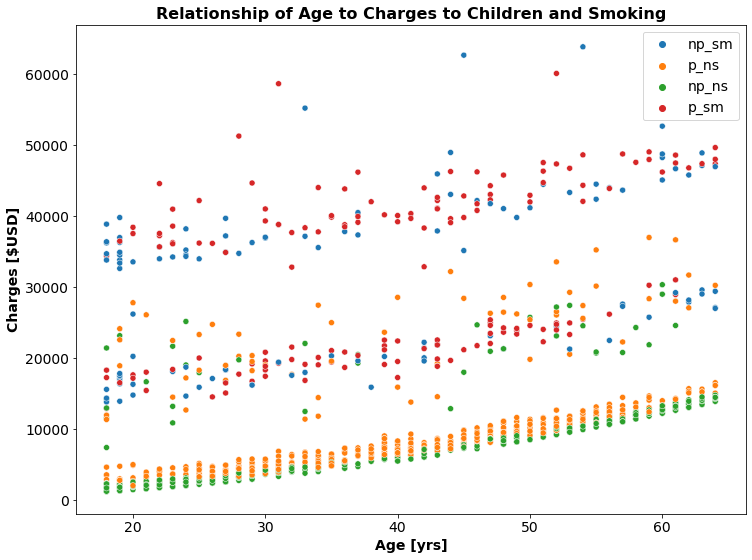

In [ ]:
fig1 = plt.figure(figsize=[12,9]);
ax0 = sns.scatterplot(data=a, x = 'age', y = 'charges', hue='parent_smoke');
plt.xlabel('Age [yrs]', fontsize='14', fontweight='bold');
plt.ylabel('Charges [$USD]', fontsize='14', fontweight='bold');
plt.title('Relationship of Age to Charges to Children and Smoking', fontsize='16', fontweight='bold');
plt.legend(fontsize=14);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
del blah, a;

<p style="font-size:18px; font-family:'Calibri Light'; font-weight:bold;">Observation:</p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Gender does not appear to be a significant contributor to higher dollar amount claims within the smoker/non-smoker groups.</p>

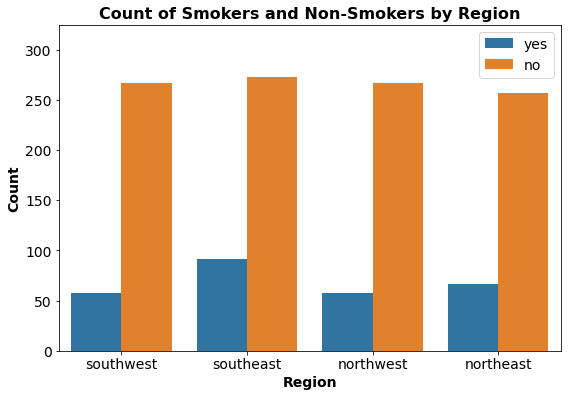

In [ ]:
fig1 = plt.figure(figsize=[9,6]);
ax0 = sns.countplot(data=dat, x = 'region', hue = 'smoker');
plt.xlabel('Region', fontsize='14', fontweight='bold');
plt.ylabel('Count', fontsize='14', fontweight='bold');
plt.title('Count of Smokers and Non-Smokers by Region', fontsize='16', fontweight='bold');
plt.legend(fontsize=14);
ax0.set(ylim=(0, 325));
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

<p style="font-size:18px; font-family:'Calibri Light'; font-weight:bold;">Observation:</p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;There appears to be some variability in the count of smokers by region. This will be investigated further with hypothesis testing.</p>

In [ ]:
blah = []
for i in np.arange(0,len(dat)):
        if np.logical_and(dat.loc[i,'sex'] == 'male', dat.loc[i,'smoker']== 'no'):
            blah.append('male ns')
        elif np.logical_and(dat.loc[i,'sex'] == 'male', dat.loc[i,'smoker']=='yes'):
            blah.append('male sm')
        elif np.logical_and(dat.loc[i,'sex'] == 'female', dat.loc[i,'smoker']=='no'):
            blah.append('female ns')
        elif np.logical_and(dat.loc[i,'sex'] == 'female', dat.loc[i,'smoker']=='yes'):
            blah.append('female sm')
a = dat.copy()
a['gender_sm'] = blah

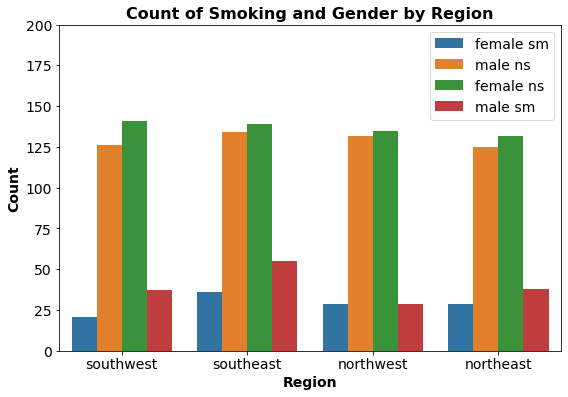

In [ ]:
fig1 = plt.figure(figsize=[9,6]);
ax0 = sns.countplot(data=a, x = 'region', hue = 'gender_sm');
plt.xlabel('Region', fontsize='14', fontweight='bold');
plt.ylabel('Count', fontsize='14', fontweight='bold');
plt.title('Count of Smoking and Gender by Region', fontsize='16', fontweight='bold');
plt.legend(fontsize=14);
ax0.set(ylim=(0, 200));
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

In [ ]:
sw_m = len(dat.loc[np.logical_and(dat['region']=='southwest', np.logical_and(dat['smoker']=='yes', dat['sex']=='male')),:])
sw_f = len(dat.loc[np.logical_and(dat['region']=='southwest', np.logical_and(dat['smoker']=='yes', dat['sex']=='female')),:])
se_m = len(dat.loc[np.logical_and(dat['region']=='southeast', np.logical_and(dat['smoker']=='yes', dat['sex']=='male')),:])
se_f = len(dat.loc[np.logical_and(dat['region']=='southeast', np.logical_and(dat['smoker']=='yes', dat['sex']=='female')),:])
nw_m = len(dat.loc[np.logical_and(dat['region']=='northwest', np.logical_and(dat['smoker']=='yes', dat['sex']=='male')),:])
nw_f = len(dat.loc[np.logical_and(dat['region']=='northwest', np.logical_and(dat['smoker']=='yes', dat['sex']=='female')),:])
ne_m = len(dat.loc[np.logical_and(dat['region']=='northeast', np.logical_and(dat['smoker']=='yes', dat['sex']=='male')),:])
ne_f = len(dat.loc[np.logical_and(dat['region']=='northeast', np.logical_and(dat['smoker']=='yes', dat['sex']=='female')),:])
ratio = [round(sw_f/sw_m,3), round(se_f/se_m,3), round(nw_f/nw_m,3), round(ne_f/ne_m,3)]
ratio = pd.DataFrame(ratio, columns=['F/M Ratio'], index=['southwest','southeast','northwest','northeast'])
ratio


,F/M Ratio
southwest,0.568
southeast,0.655
northwest,1.000
northeast,0.763


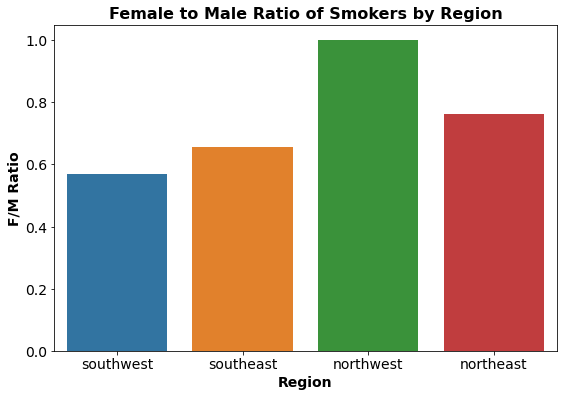

In [ ]:
fig1 = plt.figure(figsize=[9,6]);
sns.barplot(y = ratio['F/M Ratio'], x = ['southwest','southeast','northwest','northeast']);
plt.ylabel('F/M Ratio', fontsize='14', fontweight='bold');
plt.xlabel('Region', fontsize='14', fontweight='bold');
plt.title('Female to Male Ratio of Smokers by Region', fontsize='16', fontweight='bold');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

<p style="font-size:18px; font-family:'Calibri Light'; font-weight:bold;">Observation:</p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;There also appears to be some variability in the ratio of female and male smokers by region. This will also be investiged through hypothesis testing.</p>

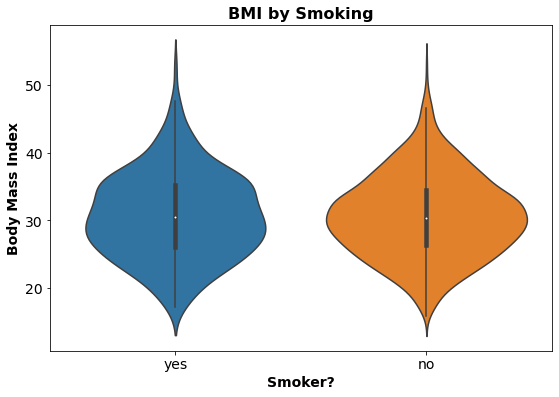

In [ ]:
fig1 = plt.figure(figsize=[9,6]);
ax0 = sns.violinplot(data=dat, y = 'bmi', x = 'smoker');
plt.xlabel('Smoker?', fontsize='14', fontweight='bold');
plt.ylabel('Body Mass Index', fontsize='14', fontweight='bold');
plt.title('BMI by Smoking', fontsize='16', fontweight='bold');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

<p style="font-size:18px; font-family:'Calibri Light'; font-weight:bold;">Observation:</p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Based upon the violinplots above, it appears that smoking may lead to higher rates of obesity.</p>

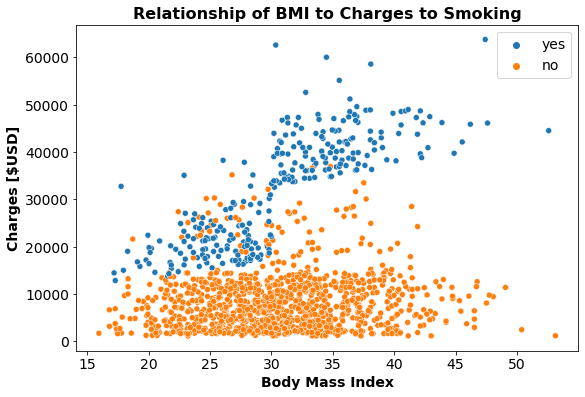

In [ ]:
fig1 = plt.figure(figsize=[9,6]);
ax0 = sns.scatterplot(data=dat, y = 'charges', x = 'bmi', hue='smoker');
plt.xlabel('Body Mass Index', fontsize='14', fontweight='bold');
plt.ylabel('Charges [$USD]', fontsize='14', fontweight='bold');
plt.title('Relationship of BMI to Charges to Smoking', fontsize='16', fontweight='bold');
plt.legend(fontsize=14);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

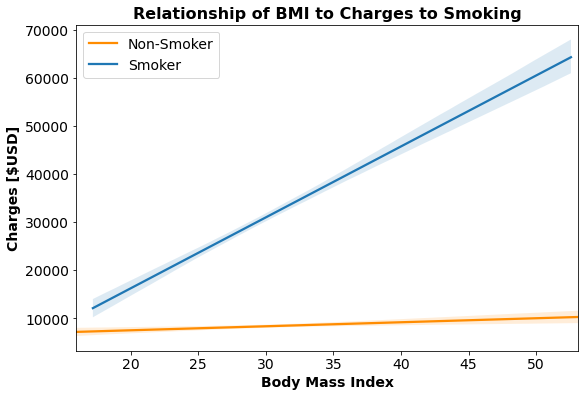

In [ ]:
fig1 = plt.figure(figsize=[9,6]);
sns.regplot(y = dat.loc[dat['smoker']=='no','charges'], x = dat.loc[dat['smoker']=='no','bmi'], scatter=False, label='Non-Smoker', color='darkorange');
sns.regplot(y = dat.loc[dat['smoker']=='yes','charges'], x = dat.loc[dat['smoker']=='yes','bmi'], scatter=False, label='Smoker', color='tab:blue');
plt.xlabel('Body Mass Index', fontsize='14', fontweight='bold');
plt.ylabel('Charges [$USD]', fontsize='14', fontweight='bold');
plt.title('Relationship of BMI to Charges to Smoking', fontsize='16', fontweight='bold');
plt.legend(fontsize=14);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

<p style="font-size:18px; font-family:'Calibri Light'; font-weight:bold;">Observation:</p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Smoking and Obesity are directly proportional to the dollar amount of medical insurance claims. All things equal, a smoker with a higher BMI will cost more to insure than a non-smoker with the same BMI.</p>

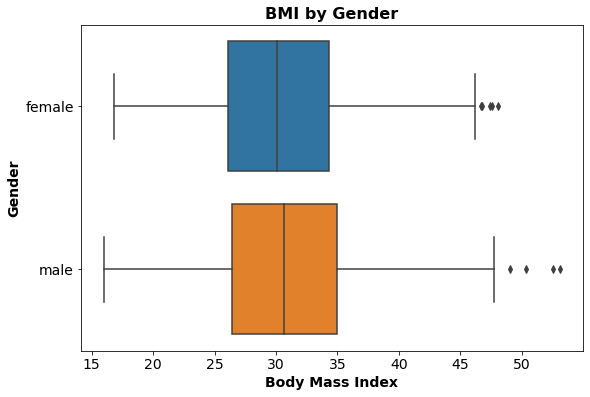

In [ ]:
fig1 = plt.figure(figsize=[9,6]);
ax0 = sns.boxplot(data = dat, y = 'sex', x = 'bmi');
plt.ylabel('Gender', fontsize='14', fontweight='bold');
plt.xlabel('Body Mass Index', fontsize='14', fontweight='bold');
plt.title('BMI by Gender', fontsize='16', fontweight='bold');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

<p style="font-size:18px; font-family:'Calibri Light'; font-weight:bold;">Observation:</p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The boxplots above demonstrate a possible right-shift in the distribution of male BMI scores compared to that of females. this will be hyporthesis tested below.</p>

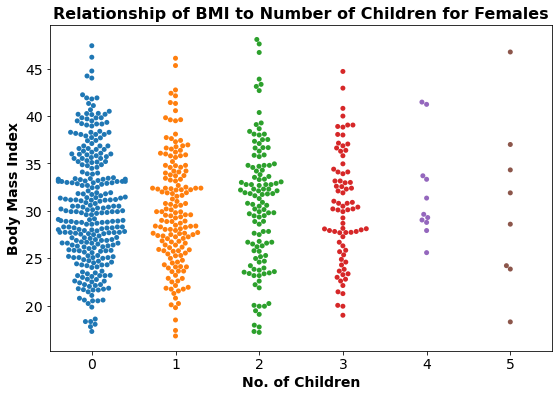

In [ ]:
fig1 = plt.figure(figsize=[9,6]);
ax0 = sns.swarmplot(y = dat.loc[dat['sex']=='female', 'bmi'], x = dat.loc[dat['sex']=='female', 'children']);
plt.ylabel('Body Mass Index', fontsize='14', fontweight='bold');
plt.xlabel('No. of Children', fontsize='14', fontweight='bold');
plt.title('Relationship of BMI to Number of Children for Females', fontsize='16', fontweight='bold');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

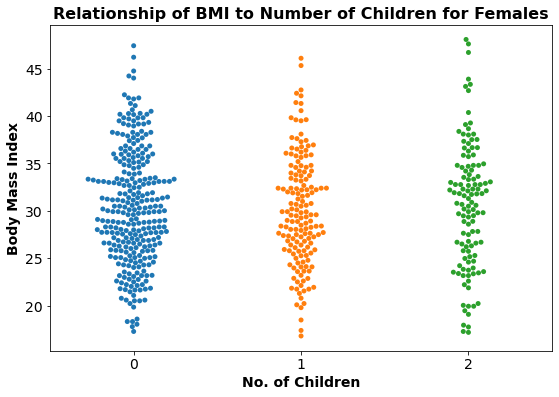

In [ ]:
fig1 = plt.figure(figsize=[9,6]);
ax0 = sns.swarmplot(y = dat.loc[np.logical_and(dat['sex']=='female',dat['children']<3), 'bmi'], x = dat.loc[np.logical_and(dat['sex']=='female',dat['children']<3), 'children']);
plt.ylabel('Body Mass Index', fontsize='14', fontweight='bold');
plt.xlabel('No. of Children', fontsize='14', fontweight='bold');
plt.title('Relationship of BMI to Number of Children for Females', fontsize='16', fontweight='bold');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

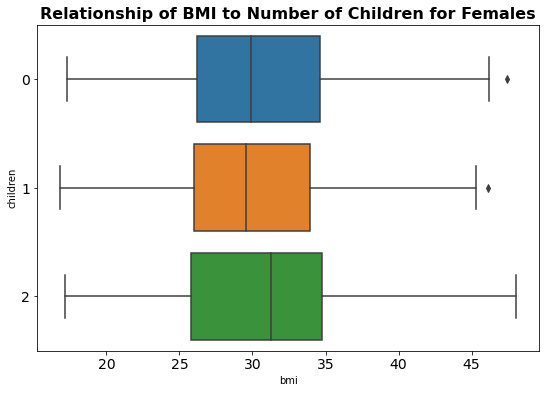

In [ ]:
blah = dat.loc[np.logical_and(dat['sex']=='female',dat['children']<3), :].copy()
blah['children'] = blah['children'].astype('category')
fig1 = plt.figure(figsize=[9,6]);
ax0 = sns.boxplot(data=blah, y = 'children', x='bmi');
#plt.ylabel('Body Mass Index', fontsize='14', fontweight='bold');
#plt.xlabel('No. of Children', fontsize='14', fontweight='bold');
plt.title('Relationship of BMI to Number of Children for Females', fontsize='16', fontweight='bold');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3; font-weight:bold;">Observation:</p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;">It's not clear from the above plots whether there is a significant difference in the mean BMI of women based upon number of childre. This will be hypothesis tested below.</p>

# <p style="font-size:24px; font-family:'Candara'; font-weight: bold; line-height:1.3">Hypothesis Testing</p>
<p style="font-size:20px; font-family:'Calibri Light'; line-height:1.3; font-weight:bold;">Objective #1: </p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Are medical claims made by smokers greater than those who don't smoke?</p>

<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;">H$_0$: $\mu_1$ $\leq$ $\mu_2$<br>
H$_a$: $\mu_1$ > $\mu_2$<br><br></p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3; font-weight:bold;">Where:</p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;">$\mu_1$ = Claims by smokers<br>
$\mu_2$ = Claims by non-smokers<br><br>
$\alpha$ = 0.05 &nbsp;&nbsp;&nbsp;&nbsp;(95% Confidence Interval)</p>

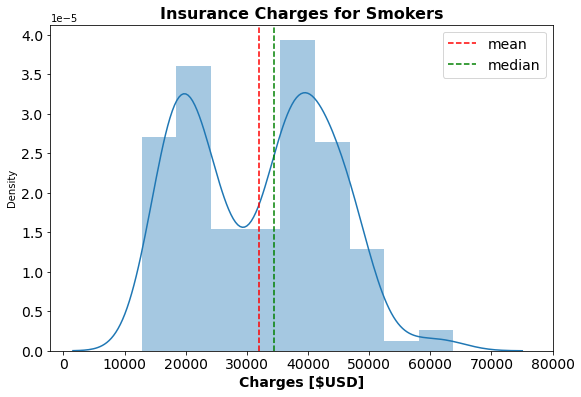

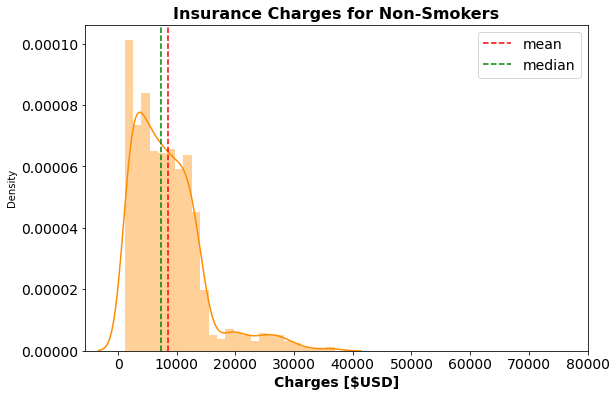

In [ ]:
# get needed data
x1 = dat.loc[dat['smoker'] == 'yes', 'charges']     #insurance charges for smokers
x2 = dat.loc[dat['smoker'] == 'no', 'charges']      #insurance charges for non-smokers

# reset index
x1.reset_index(drop=True, inplace=True)
x2.reset_index(drop=True, inplace=True)

#histogram of charges for smokers
fig1 = plt.figure(figsize=[9,6]);
ax0 = sns.distplot(x1, color='tab:blue');
ax0.axvline(np.mean(x1),color='red',linestyle='--', label='mean')
ax0.axvline(np.median(x1),color='green',linestyle='--', label='median')
#ax0.axvline(stats2.mode(x1),color='black',linestyle='--', label='mode')
plt.xlabel('Charges [$USD]', fontsize='14', fontweight='bold');
plt.title('Insurance Charges for Smokers', fontsize='16', fontweight='bold');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(fontsize=14);
ax0.set_xticks(np.arange(0,80001,10000));

#histogram of charges for non-smokers
fig2 = plt.figure(figsize=[9,6]);
ax1 = sns.distplot(x2, color='darkorange');
ax1.axvline(np.mean(x2),color='red',linestyle='--', label='mean')
ax1.axvline(np.median(x2),color='green',linestyle='--', label='median')
#ax1.axvline(stats2.mode(x2),color='black',linestyle='--', label='mode')
plt.xlabel('Charges [$USD]', fontsize='14', fontweight='bold');
plt.title('Insurance Charges for Non-Smokers', fontsize='16', fontweight='bold');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(fontsize=14);
ax1.set_xticks(np.arange(0,80001,10000));

In [ ]:
print('Skew of smoker distribution :          %.4f' % stats.skew(x1)) #not skewed
print('Skew of non-smoker distribution :      %.4f' % stats.skew(x2)) # high positive skew
print('Kurtosis of smoker distribution :     %.4f' % stats.kurtosis(x1)) #excess kurtosis present
print('Kurtosis of non-smoker distribution :  %.4f' % stats.kurtosis(x2)) #extreme excess kurtosis present

Skew of smoker distribution :          0.1275
Skew of non-smoker distribution :      1.5360
Kurtosis of smoker distribution :     -1.0395
Kurtosis of non-smoker distribution :  3.1288


<p style="font-size:18px; font-family:'Calibri Light';">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The non-smoker distribution is both positively skewed and highly leptokurtic on one-tail. The smoker distribution is slightly platykurtic (kurt -1). Let's attempt to transform the distributions to normal using the Box-Cox Transform.</p>

# <p style="font-size:24px; font-family:'Calibri Light';">Box-Cox Transformation</p>
<p style="font-size:18px; font-family:'Calibri Light';">Since the distribution is significantly positively skewed for the non-smoker distribution, let's apply a Box-Cox transformation on both to get a more normal distribution and see if the data passes normality tests.</p>

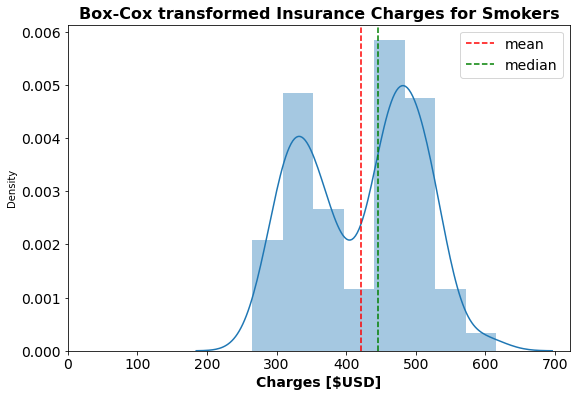

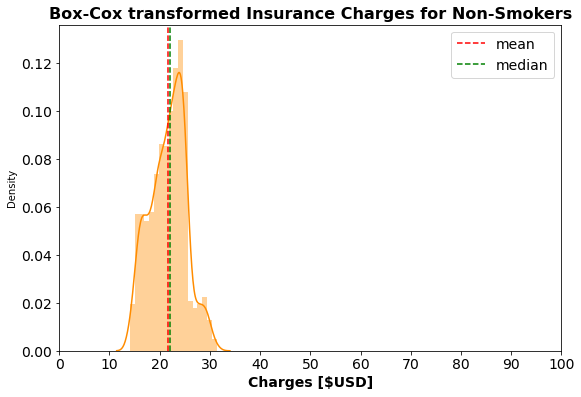

In [ ]:
# Box-Cox transform of data
tx1, _ = stats.boxcox(x1)      #insurance charges for smokers
tx2, _ = stats.boxcox(x2)      #insurance charges for non-smokers

# reset index
#x1.reset_index(drop=True, inplace=True)
#x2.reset_index(drop=True, inplace=True)

#histogram of charges for smokers
fig1 = plt.figure(figsize=[9,6]);
ax0 = sns.distplot(tx1, color='tab:blue');
ax0.axvline(np.mean(tx1),color='red',linestyle='--', label='mean')
ax0.axvline(np.median(tx1),color='green',linestyle='--', label='median')
#ax0.axvline(stats2.mode(tx1),color='black',linestyle='--', label='mode')
plt.xlabel('Charges [$USD]', fontsize='14', fontweight='bold');
plt.title('Box-Cox transformed Insurance Charges for Smokers', fontsize='16', fontweight='bold');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(fontsize=14);
ax0.set_xticks(np.arange(0,701,100));

#histogram of charges for non-smokers
fig2 = plt.figure(figsize=[9,6]);
ax1 = sns.distplot(tx2, color='darkorange');
ax1.axvline(np.mean(tx2),color='red',linestyle='--', label='mean')
ax1.axvline(np.median(tx2),color='green',linestyle='--', label='median')
#ax1.axvline(stats2.mode(tx2),color='black',linestyle='--', label='mode')
plt.xlabel('Charges [$USD]', fontsize='14', fontweight='bold');
plt.title('Box-Cox transformed Insurance Charges for Non-Smokers', fontsize='16', fontweight='bold');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(fontsize=14);
ax1.set_xticks(np.arange(0,101,10));

In [ ]:
print('Skew of smoker distribution : %.4f' % stats.skew(tx1))
print('Skew of non-smoker distribution : %.4f' % stats.skew(tx2))
print('Kurtosis of smoker distribution : %.4f' % stats.kurtosis(tx1)) #slight excess kurtosis present
print('Kurtosis of non-smoker distribution : %.4f' % stats.kurtosis(tx2)) #significant excess kurtosis presemt

Skew of smoker distribution : -0.0866
Skew of non-smoker distribution : -0.0236
Kurtosis of smoker distribution : -1.2326
Kurtosis of non-smoker distribution : -0.4719


<p style="font-size:18px; font-family:'Calibri Light';">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The Box-Cox transform brought the skew of both distributions to near normality. It also brought the kurtosis closer to normality for the non-smoker distribution but slightly increased the platykurtosis of the smoker distribution. This is close enough to continue forward with hypothesis testing in this case.</p>

<p style="font-size:24px; font-weight:bold; font-family:'Calibri Light';">First attempt: Two-Sample T-test</p>
<p style="font-size:18px; font-family:'Calibri Light';">A two sample T-test appears to be the appropriate test for this hypothesis because the population standard deviation is unknown and we are comparing two separate sample distributions.</p>

<p style="font-size:20px; font-weight:bold; font-family:'Calibri Light';">The assumptions of the two-sample t-test:</p>
<ul>
    <li><p style="font-size:18px; font-family:'Calibri Light';">The data are continuous (not discrete).</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light';">The data follow the normal probability distribution.</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light';">The variances of the two populations are equal. (If not, the Aspin-Welch Unequal-Variance test is used.)</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light';">The two samples are independent. There is no relationship between the individuals in one sample as compared to the other (as there is in the paired t-test).</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light';">Both samples are simple random samples from their respective populations. Each individual in the population has an equal probability of being selected in the sample.</p></li>
</ul>
<p style="font-size:18px; font-family:'Calibri Light';">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Here, we see that all assumptions are met except two: whether the data follows the normal probability distribution and whether the variances of the two populations are equal.<br><br>Below, these assumptions are tested.</p>

<p style="font-size:20px; font-weight:bold; font-family:'Calibri Light';">Shapiro-Wilks and Anderson-Darling Test for Normality</p>
<p style="font-size:18px; font-family:'Calibri Light';">Will use the Shapiro-Wilks test and the Anderson-Darling test to determine whether the data is normally distributed. The hypothesis is as follows:</p>
<p style="font-size:18px; font-family:'Calibri Light';">H<sub>0</sub>: The data is normally distributed<br>
H<sub>a</sub>: The data is not normally distributed<br><br>
$\alpha$ = 0.01</p>

In [ ]:
#test for normality of sample data using both Shapiro-Wilks Test and Anderson-Darling Test
statistic1, pval1 = stats.shapiro(tx1)
statistic2, pval2 = stats.shapiro(tx2)
astat1, crit1, sig1 = stats.anderson(tx1, dist='norm')
astat2, crit2, sig2 = stats.anderson(tx2, dist='norm')
#print results
blah1 = astat1/crit1[4]
blah2 = astat2/crit2[4]
print("Shapiro-Wilks test")
print('Charges by smokers:      p-value: %.8f' % pval1)
print('Charges by non-smokers:  p-value: %.8f' % pval2)
print('\nAnderson-Darling Test')
print('Charges by smokers:      Anderson-Darling statistic is %.2f times the critical value for alpha = 0.01' % blah1)
print('Charges by non-smokers:  Anderson-Darling statistic is %.2f times the critical value for alpha = 0.01' % blah2)
print('\nNumber of samples:')
print('Charges by smokers:      n = {}' .format(len(x1)))
print('Charges by non-smokers:  n = {}' .format(len(x2)))

Shapiro-Wilks test
Charges by smokers:      p-value: 0.00000000
Charges by non-smokers:  p-value: 0.00000000

Anderson-Darling Test
Charges by smokers:      Anderson-Darling statistic is 6.50 times the critical value for alpha = 0.01
Charges by non-smokers:  Anderson-Darling statistic is 4.73 times the critical value for alpha = 0.01

Number of samples:
Charges by smokers:      n = 274
Charges by non-smokers:  n = 1064


<p style="font-size:18px; font-family:'Calibri Light';">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;From the tests for normality performed above, it is demonstrated that the data violates the normality assumption for a two-sample t-test: both the p-values claculated using the Shapiro-Wilks test and the statistic calculated using Anderson-Darling test indicate a significant departure from normality. However, since the sample sizes of both sets of data are greater than 30 (n > 30), we will invoke the central limit theorem and proceed ahead with testing whether the variances of the two populations are equal.</p>

# <p style="font-size:24px; font-weight:bold; font-family:'Calibri Light';">Levene's Test for Equality of Variance</p>
<p style="font-size:18px; font-family:'Calibri Light';">H<sub>0</sub>: The variances are equal across all samples.<br>
H<sub>a</sub>: The variances are not equal for at least one pair.<br><br>
$\alpha$ = 0.05<br>
<br>
Here we will use Levene's Test because the data failed Shapiro-Wilks test and Anderson-Darling's test. Levene's test is more robust with data that is found to not follow a normal distribution. If the samples had passed the Shapiro-Wilks test and Anderson-Darling's test, Bartlett's test for equality of variance is the more appropriate test.</p>


In [ ]:
#use Levene's test for equality of variace because the data departs from normality, otherwise, we would have used Bartlett's test
stat, pval = stats.levene(tx1, tx2, center='mean')

if pval < 0.05:
    print('Reject Null Hypothesis: the variances are not equal for at least one pair.\np-value: %.8f' % pval)
else:
    print('Fail to Reject Null Hypothesis: the variances are equal across all samples.\np-value: %.8f' % pval)

Reject Null Hypothesis: the variances are not equal for at least one pair.
p-value: 0.00000000


<p style="font-size:18px; font-family:'Calibri Light';">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;It has been found that the sample data violates the assumption of equality of variance. A Welch's t-test (or unequal variance t-test) must be performed instead of a Student's two-sample t-test.</p>

# <p style="font-size:24px; font-weight:bold">Welch's One-tail, Two-Sample T-test</p>
<p style="font-size:18px; font-family:'Calibri Light';">If you recall, our Null and Alternative Hypotheses are:</p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;">H$_0$: $\mu_1$ $\leq$ $\mu_2$<br>
H$_a$: $\mu_1$ > $\mu_2$<br><br></p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3; font-weight:bold;">Where:</p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;">$\mu_1$ = Claims by smokers<br>
$\mu_2$ = Claims by non-smokers<br><br>
$\alpha$ = 0.05 &nbsp;&nbsp;&nbsp;&nbsp;(95% Confidence Interval)</p>

In [ ]:
#Perform Welch's two-sample t-test on log-transformed data
statistic, pval = stats.ttest_ind(tx1, tx2, equal_var = False) #should use alternative='greater' in newer versions of scipy (>1.4.1). 1.4.1 does not allow anything but two-sided test.

if pval1 < 0.05:
    print('Reject Null Hypothesis: claims by smokers are statistically greater than claims by non-smokers.\np-value: %.8f' % pval1)
else:
    print('Fail to Reject Null Hypothesis: claims by smokers are either statistically equal to or less than claims by non-smokers.\np-value: %.8f' % pval1)

Reject Null Hypothesis: claims by smokers are statistically greater than claims by non-smokers.
p-value: 0.00000000


<p style="font-size:20px; font-family:'Calibri Light'; line-height:1.3; font-weight:bold;">Objective #2: </p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Is the BMI of females different than the BMI of males?</p>

<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;">H$_0$: $\mu_1$ = $\mu_2$<br>
H$_a$: $\mu_1$ $\neq$ $\mu_2$<br><br></p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3; font-weight:bold;">Where:</p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;">$\mu_1$ = BMI of females<br>
$\mu_2$ = BMI of males<br><br>
$\alpha$ = 0.05 &nbsp;&nbsp;&nbsp;&nbsp;(95% Confidence Interval)</p>

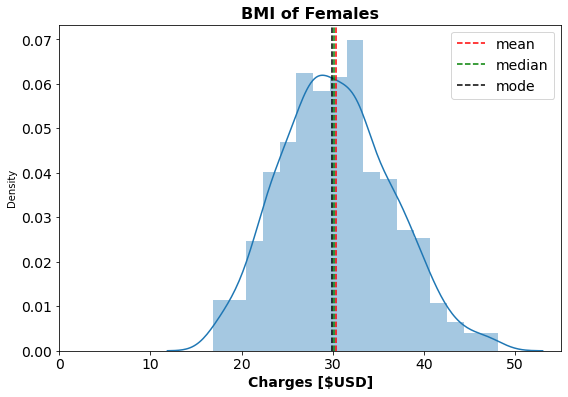

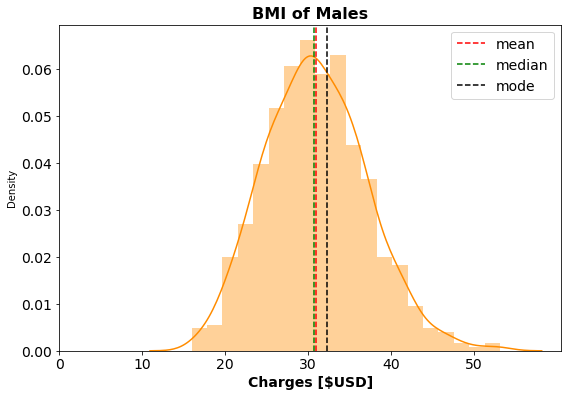

In [ ]:
# get needed data
x1 = dat.loc[dat['sex'] == 'female', 'bmi']     # BMI of females
x2 = dat.loc[dat['sex'] == 'male', 'bmi']       # BMI of males

# reset index
x1.reset_index(drop=True, inplace=True)
x2.reset_index(drop=True, inplace=True)

#histogram of bmi for females
fig1 = plt.figure(figsize=[9,6]);
ax0 = sns.distplot(x1, color='tab:blue');
ax0.axvline(np.mean(x1),color='red',linestyle='--', label='mean')
ax0.axvline(np.median(x1),color='green',linestyle='--', label='median')
ax0.axvline(stats2.mode(x1),color='black',linestyle='--', label='mode')
plt.xlabel('Charges [$USD]', fontsize='14', fontweight='bold');
plt.title('BMI of Females', fontsize='16', fontweight='bold');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(fontsize=14);
ax0.set_xticks(np.arange(0,60,10));

#histogram of bmi for males
fig2 = plt.figure(figsize=[9,6]);
ax1 = sns.distplot(x2, color='darkorange');
ax1.axvline(np.mean(x2),color='red',linestyle='--', label='mean')
ax1.axvline(np.median(x2),color='green',linestyle='--', label='median')
ax1.axvline(stats2.mode(x2),color='black',linestyle='--', label='mode')
plt.xlabel('Charges [$USD]', fontsize='14', fontweight='bold');
plt.title('BMI of Males', fontsize='16', fontweight='bold');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(fontsize=14);
ax1.set_xticks(np.arange(0,60,10));

# <p style="font-size:24px; font-weight:bold; font-family:'Calibri Light';">Shapiro-Wilks and Anderson-Darling Tests for Normality</p>
<p style="font-size:18px; font-family:'Calibri Light';">Will use the Shapiro-Wilks test and the Anderson-Darling test to determine whether the data is normally distributed. The hypothesis is as follows:</p>
<p style="font-size:18px; font-family:'Calibri Light';">H<sub>0</sub>: The data is normally distributed<br>
H<sub>a</sub>: The data is not normally distributed<br><br>
$\alpha$ = 0.01</p>

In [ ]:
#test for normality of sample data using both Shapiro-Wilks Test and Anderson-Darling Test
statistic1, pval1 = stats.shapiro(x1)
statistic2, pval2 = stats.shapiro(x2)
astat1, crit1, sig1 = stats.anderson(x1, dist='norm')
astat2, crit2, sig2 = stats.anderson(x2, dist='norm')
#print results
blah1 = astat1/crit1[4]
blah2 = astat2/crit2[4]
print("Shapiro-Wilks test")
print('BMI of females:  p-value: %.8f' % pval1)
print('BMI of males:    p-value: %.8f' % pval2)
print('\nAnderson-Darling Test')
print('BMI of females:  Anderson-Darling statistic is %.2f times the critical value for alpha = 0.01' % blah1)
print('BMI of males:    Anderson-Darling statistic is %.2f times the critical value for alpha = 0.01' % blah2)
print('\nNumber of samples:')
print('BMI of females:  n = {}' .format(len(x1)))
print('BMI of males:    n = {}' .format(len(x2)))

Shapiro-Wilks test
BMI of females:  p-value: 0.00354337
BMI of males:    p-value: 0.00313064

Anderson-Darling Test
BMI of females:  Anderson-Darling statistic is 0.75 times the critical value for alpha = 0.01
BMI of males:    Anderson-Darling statistic is 0.58 times the critical value for alpha = 0.01

Number of samples:
BMI of females:  n = 662
BMI of males:    n = 676


<p style="font-size:18px; font-family:'Calibri Light';">&nbsp;&nbsp;&nbsp;&nbsp;Here it is found that the distributions are approximately normal. While the p-value's calculated in Shapiro-Wilks test tend to non-normality, the Anderson-Darling statistics indicate otherwise. It's important to note that larger n values tend to bias these tests toward a finding of non-normality, so the interpretation of such tests requires more leniency when dealing with higher sample datasets. Also, visually the distributions appear approximately normal. Next we will test whether the variances of the two populations are equal.</p>

# <p style="font-size:24px; font-weight:bold; font-family:'Calibri Light';">Bartlett's Test for Equality of Variance</p>
<p style="font-size:18px; font-family:'Calibri Light';">H<sub>0</sub>: The variances are equal across all samples.<br>
H<sub>a</sub>: The variances are not equal for at least one pair.<br><br>
$\alpha$ = 0.05<br>
<br>
Here we will use Bartlett's test for equality of variance because the data was found to be approximately normal.</p>

In [ ]:
#use Bartlett's test for equality of variance because the data is approximately normal
stat, pval = stats.bartlett(x1, x2)

if pval < 0.05:
    print('Reject Null Hypothesis: the variances are not equal for at least one pair.\np-value: %.4f' % pval)
else:
    print('Fail to Reject Null Hypothesis: the variances are equal across all samples.\np-value: %.4f' % pval)

Fail to Reject Null Hypothesis: the variances are equal across all samples.
p-value: 0.6890


# <p style="font-size:24px; font-weight:bold">Two-Sample T-test</p>
<p style="font-size:18px">A two sample T-test is the appropriate test for this hypothesis because all of the following assumptions are met:</p>
<p style="font-size:20px; font-weight:bold; font-family:'Calibri Light';">The assumptions of the two-sample t-test:</p>
<ul>
    <li><p style="font-size:18px; font-family:'Calibri Light';">The data are continuous (not discrete).</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light';">The data follow the normal probability distribution.</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light';">The variances of the two populations are equal. (If not, the Aspin-Welch Unequal-Variance test is used.)</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light';">The two samples are independent. There is no relationship between the individuals in one sample as compared to the other (as there is in the paired t-test).</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light';">Both samples are simple random samples from their respective populations. Each individual in the population has an equal probability of being selected in the sample.</p></li>
</ul>

In [ ]:
#Student's Two-Sample t-test
statistic, pval = stats.ttest_ind(x1, x2, equal_var = True) #should use alternative='two-sided' in newer versions of scipy (> 1.4.1)

if pval < 0.05:
    print('Reject Null Hypothesis: the BMI of females is statistically different than the BMI of males.\np-value: %.4f' % pval)
else:
    print('Fail to Reject Null Hypothesis: the BMI of females and the BMI of males are not statistically different.\np-value: %.4f' % pval)

Fail to Reject Null Hypothesis: the BMI of females and the BMI of males are not statistically different.
p-value: 0.5972


<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3; font-weight:bold;">Objective #3: </p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Is the proportion of smokers significantly different across different regions?</p>

<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;">H$_0$: There is no relationship between smoking and region<br>
H$_a$: There is a relationship between smoking and region<br><br>$\alpha$ = 0.05 &nbsp;&nbsp;&nbsp;&nbsp;(95% Confidence Interval)</p>

# <p style="font-size:24px; font-family:'Calibri Light'; line-height:1.3; font-weight:bold;">Chi-Square Test of Independence</p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The Chi-Square Test of Independence looks at whether there is a significant relationship between two categorical variables (in this case smoking and region). The frequency of each category of one categorical variable is compared across the categories of the other categorical variable. The assumptions for this test are that the sample is randomly drawn from the population and that all expected values are at least 5.</p>

In [ ]:
#get data in correct form to create a pandas crosstab
reg = []
smoke = []
for i in np.arange(0,len(dat)):
    if dat.loc[i,'region'] == 'northwest':
        reg.append('northwest')
        if dat.loc[i,'smoker'] == 'yes':
            smoke.append('smoker')
        else:
            smoke.append('non-smoker')
    if dat.loc[i,'region'] == 'northeast':
        reg.append('northeast')
        if dat.loc[i,'smoker'] == 'yes':
            smoke.append('smoker')
        else:
            smoke.append('non-smoker')      
    if dat.loc[i,'region'] == 'southwest':
        reg.append('southwest')
        if dat.loc[i,'smoker'] == 'yes':
            smoke.append('smoker')
        else:
            smoke.append('non-smoker')
    if dat.loc[i,'region'] == 'southeast':
        reg.append('southeast')
        if dat.loc[i,'smoker'] == 'yes':
            smoke.append('smoker')
        else:
            smoke.append('non-smoker')
ct = pd.DataFrame()
ct['region'] = reg
ct['smoke'] = smoke

#create pandas crosstab
cross = pd.crosstab(ct.region, ct.smoke)
cross

smoke,non-smoker,smoker
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


In [ ]:
# Chi-square test of independence.
c, p, dof, expected = stats.chi2_contingency(cross)

#contingency
print('statistic = {}  |  p-value = {}  |  DOF = {}\n\nExpected Values:\n{}'.format(np.round(c, 4), np.round(p, 4), np.round(dof, 0), expected))

statistic = 7.3435  |  p-value = 0.0617  |  DOF = 3

Expected Values:
[[257.65022422  66.34977578]
 [258.44544096  66.55455904]
 [289.45889387  74.54110613]
 [258.44544096  66.55455904]]


<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;">Here, we fail to reject the Null Hypothesis (p-value = 0.06) and conclude that there is no relationship between smoking and region.</p>

# <p style="font-size:24px; font-family:'Calibri Light'; line-height:1.3; font-weight:bold;">Chi-Square Post-Hoc Analysis and Bonferroni Correction</p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Next, a post-hoc analysis looking at the relationship between each region is performed. As there will be multiple hypothesis tests performed for this post-hoc analysis, the p-value needs to be corrected to compensate for the increased likelihood of type I error.
This is done by applying the Bonferroni correction or by testing each individual hypothesis at a significance level of $\frac{\alpha}{m}$ where $\alpha$ is the desired overall alpha level (here $\alpha$ = 0.05) and m is the number of hypotheses (here m = 6). The Bonferroni corrected p-value for this ad-hoc analysis, therefore, is 0.0083.</p>

In [ ]:
c1, p1, dof1, expected1 = stats.chi2_contingency(cross.iloc[[0,1],:])
c2, p2, dof2, expected2 = stats.chi2_contingency(cross.iloc[[0,2],:])
c3, p3, dof3, expected3 = stats.chi2_contingency(cross.iloc[[0,3],:])
c4, p4, dof4, expected4 = stats.chi2_contingency(cross.iloc[[1,2],:])
c5, p5, dof5, expected5 = stats.chi2_contingency(cross.iloc[[1,3],:])
c6, p6, dof6, expected6 = stats.chi2_contingency(cross.iloc[[2,3],:])

#contingency
print('northeast & northwest : statistic = {}  |  p-value = {}  |  DOF = {}\n\n'.format(np.round(c1, 4), np.round(p1, 4), np.round(dof1, 0)))
print('northeast & southeast : statistic = {}  |  p-value = {}  |  DOF = {}\n\n'.format(np.round(c2, 4), np.round(p2, 4), np.round(dof2, 0)))
print('northeast & southwest : statistic = {}  |  p-value = {}  |  DOF = {}\n\n'.format(np.round(c3, 4), np.round(p3, 4), np.round(dof3, 0)))
print('northwest & southeast : statistic = {}  |  p-value = {}  |  DOF = {}\n\n'.format(np.round(c4, 4), np.round(p4, 4), np.round(dof4, 0)))
print('northwest & southwest : statistic = {}  |  p-value = {}  |  DOF = {}\n\n'.format(np.round(c5, 4), np.round(p5, 4), np.round(dof5, 0)))
print('southeast & southwest : statistic = {}  |  p-value = {}  |  DOF = {}'.format(np.round(c6, 4), np.round(p6, 4), np.round(dof6, 0)))

northeast & northwest : statistic = 0.665  |  p-value = 0.4148  |  DOF = 1


northeast & southeast : statistic = 1.5731  |  p-value = 0.2098  |  DOF = 1


northeast & southwest : statistic = 0.665  |  p-value = 0.4148  |  DOF = 1


northwest & southeast : statistic = 4.771  |  p-value = 0.0289  |  DOF = 1


northwest & southwest : statistic = 0.0  |  p-value = 1.0  |  DOF = 1


southeast & southwest : statistic = 4.771  |  p-value = 0.0289  |  DOF = 1


<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;">As none of the p-values for the post-hoc tests fall below the bonferroni corrected p-value of 0.0083, there is no statistically significant relationship between region and smoking for any combination of regions.</p>

<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3; font-weight: bold">As a follow-up question: Is the proportion of female smokers significantly different across regions?</p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;">H$_0$: There is no relationship between female smoking and region<br>
H$_a$: There is a relationship between female smoking and region<br><br>$\alpha$ = 0.05 &nbsp;&nbsp;&nbsp;&nbsp;(95% Confidence Interval)</p>

In [ ]:
#get data in correct form to create a pandas crosstab
reg = []
fem_sm = []
for i in np.arange(0,len(dat)):
    if dat.loc[i,'region'] == 'northwest':
        reg.append('northwest')
        if np.logical_and(dat.loc[i,'smoker'] == 'yes', dat.loc[i,'sex'] == 'female') == True:
            fem_sm.append('female smoker')
        else:
            fem_sm.append('not female smoker')
    if dat.loc[i,'region'] == 'northeast':
        reg.append('northeast')
        if np.logical_and(dat.loc[i,'smoker'] == 'yes', dat.loc[i,'sex'] == 'female') == True:
            fem_sm.append('female smoker')
        else:
            fem_sm.append('not female smoker')      
    if dat.loc[i,'region'] == 'southwest':
        reg.append('southwest')
        if np.logical_and(dat.loc[i,'smoker'] == 'yes', dat.loc[i,'sex'] == 'female') == True:
            fem_sm.append('female smoker')
        else:
            fem_sm.append('not female smoker')
    if dat.loc[i,'region'] == 'southeast':
        reg.append('southeast')
        if np.logical_and(dat.loc[i,'smoker'] == 'yes', dat.loc[i,'sex'] == 'female') == True:
            fem_sm.append('female smoker')
        else:
            fem_sm.append('not female smoker')
ct1 = pd.DataFrame()
ct1['region'] = reg
ct1['female_sm'] = fem_sm

#create pandas crosstab
cross2 = pd.crosstab(ct1.region, ct1.female_sm)
cross2

female_sm,female smoker,not female smoker
region,,
northeast,29,295
northwest,29,296
southeast,36,328
southwest,21,304


In [ ]:
# Chi-square test of independence.
c2, p2, dof2, expected2 = stats.chi2_contingency(cross2)

#contingency
print('statistic = {}  |  p-value = {}  |  DOF = {}\n\nExpected Values:\n{}'.format(np.round(c2, 4), np.round(p2, 4), np.round(dof2, 0), expected2))

statistic = 2.7568  |  p-value = 0.4307  |  DOF = 3

Expected Values:
[[ 27.84753363 296.15246637]
 [ 27.93348281 297.06651719]
 [ 31.28550075 332.71449925]
 [ 27.93348281 297.06651719]]


<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;">It is concluded that there is no relationship between female smoking and region (p-value = 0.4307).</p>

<p style="font-size:20px; font-family:'Calibri Light'; line-height:1.3; font-weight:bold;">Chi-Square Post-Hoc Analysis and Bonferroni Correction</p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Next, a post-hoc analysis is performed with a Bonferroni corrected p-value of 0.0083.</p>

In [ ]:
c1, p1, dof1, expected1 = stats.chi2_contingency(cross2.iloc[[0,1],:])
c2, p2, dof2, expected2 = stats.chi2_contingency(cross2.iloc[[0,2],:])
c3, p3, dof3, expected3 = stats.chi2_contingency(cross2.iloc[[0,3],:])
c4, p4, dof4, expected4 = stats.chi2_contingency(cross2.iloc[[1,2],:])
c5, p5, dof5, expected5 = stats.chi2_contingency(cross2.iloc[[1,3],:])
c6, p6, dof6, expected6 = stats.chi2_contingency(cross2.iloc[[2,3],:])

#contingency
print('northeast & northwest : statistic = {}  |  p-value = {}  |  DOF = {}\n\n'.format(np.round(c1, 4), np.round(p1, 4), np.round(dof1, 0)))
print('northeast & southeast : statistic = {}  |  p-value = {}  |  DOF = {}\n\n'.format(np.round(c2, 4), np.round(p2, 4), np.round(dof2, 0)))
print('northeast & southwest : statistic = {}  |  p-value = {}  |  DOF = {}\n\n'.format(np.round(c3, 4), np.round(p3, 4), np.round(dof3, 0)))
print('northwest & southeast : statistic = {}  |  p-value = {}  |  DOF = {}\n\n'.format(np.round(c4, 4), np.round(p4, 4), np.round(dof4, 0)))
print('northwest & southwest : statistic = {}  |  p-value = {}  |  DOF = {}\n\n'.format(np.round(c5, 4), np.round(p5, 4), np.round(dof5, 0)))
print('southeast & southwest : statistic = {}  |  p-value = {}  |  DOF = {}'.format(np.round(c6, 4), np.round(p6, 4), np.round(dof6, 0)))

northeast & northwest : statistic = 0.0157  |  p-value = 0.9003  |  DOF = 1


northeast & southeast : statistic = 0.0841  |  p-value = 0.7718  |  DOF = 1


northeast & southwest : statistic = 1.0853  |  p-value = 0.2975  |  DOF = 1


northwest & southeast : statistic = 0.0918  |  p-value = 0.7619  |  DOF = 1


northwest & southwest : statistic = 1.0617  |  p-value = 0.3028  |  DOF = 1


southeast & southwest : statistic = 2.2271  |  p-value = 0.1356  |  DOF = 1


<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3; font-weight:bold;">Objective #4: </p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Is the mean BMI of women with no children, one child, and two children the same?</p>

<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;">H$_0$: $\mu_1$ = $\mu_2$ = $\mu_3$<br>
H$_a$: $\mu_1$ $\neq$ $\mu_2$ &nbsp;|&nbsp; $\mu_2$ $\neq$ $\mu_3$ &nbsp;|&nbsp; $\mu_1$ $\neq$ $\mu_3$<br><br></p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3; font-weight:bold;">Where:</p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;">$\mu_1$ = BMI of women with no children<br>
$\mu_2$ = BMI of women with one child<br>
$\mu_3$ = BMI of women with two children<br><br>
$\alpha$ = 0.05 &nbsp;&nbsp;&nbsp;&nbsp;(95% Confidence Interval)</p>

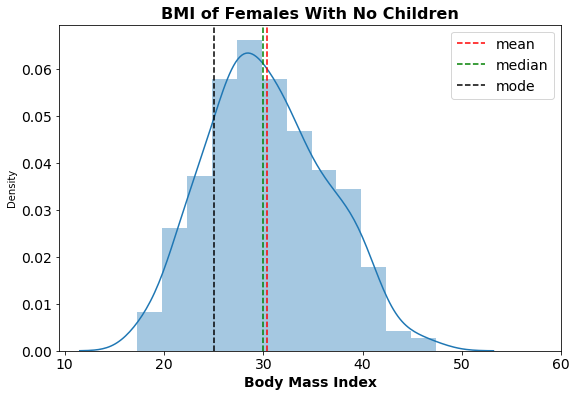

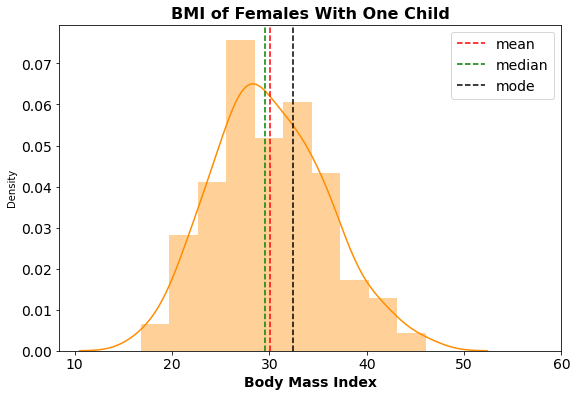

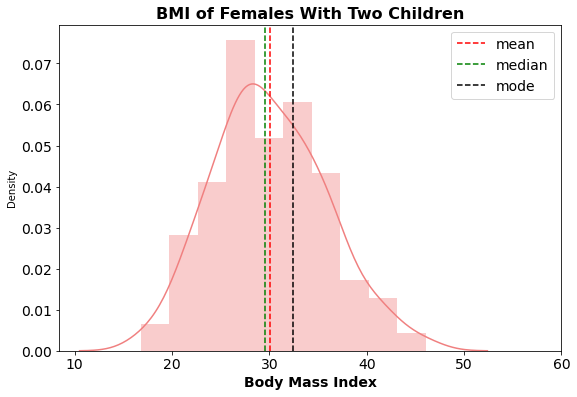

In [ ]:
# get needed data
x1 = dat.loc[np.logical_and(dat['sex'] == 'female', dat['children'] == 0), 'bmi']     # BMI of females with no children
x2 = dat.loc[np.logical_and(dat['sex'] == 'female', dat['children'] == 1), 'bmi']     # BMI of females with 1 children
x3 = dat.loc[np.logical_and(dat['sex'] == 'female', dat['children'] == 2), 'bmi']     # BMI of females with 2 children

# reset index
x1.reset_index(drop=True, inplace=True)
x2.reset_index(drop=True, inplace=True)
x3.reset_index(drop=True, inplace=True)

#histogram of bmi for females with no children
fig1 = plt.figure(figsize=[9,6]);
ax0 = sns.distplot(x1, color='tab:blue');
ax0.axvline(np.mean(x1),color='red',linestyle='--', label='mean')
ax0.axvline(np.median(x1),color='green',linestyle='--', label='median')
ax0.axvline(stats2.mode(x1),color='black',linestyle='--', label='mode')
plt.xlabel('Body Mass Index', fontsize='14', fontweight='bold');
plt.title('BMI of Females With No Children', fontsize='16', fontweight='bold');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(fontsize=14);
ax0.set_xticks(np.arange(10,61,10));

#histogram of bmi for females with one children
fig2 = plt.figure(figsize=[9,6]);
ax1 = sns.distplot(x2, color='darkorange');
ax1.axvline(np.mean(x2),color='red',linestyle='--', label='mean')
ax1.axvline(np.median(x2),color='green',linestyle='--', label='median')
ax1.axvline(stats2.mode(x2),color='black',linestyle='--', label='mode')
plt.xlabel('Body Mass Index', fontsize='14', fontweight='bold');
plt.title('BMI of Females With One Child', fontsize='16', fontweight='bold');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(fontsize=14);
ax1.set_xticks(np.arange(10,61,10));

#histogram of bmi for females with two children
fig3 = plt.figure(figsize=[9,6]);
ax2 = sns.distplot(x2, color='lightcoral');
ax2.axvline(np.mean(x2),color='red',linestyle='--', label='mean')
ax2.axvline(np.median(x2),color='green',linestyle='--', label='median')
ax2.axvline(stats2.mode(x2),color='black',linestyle='--', label='mode')
plt.xlabel('Body Mass Index', fontsize='14', fontweight='bold');
plt.title('BMI of Females With Two Children', fontsize='16', fontweight='bold');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(fontsize=14);
ax2.set_xticks(np.arange(10,61,10));

In [ ]:
print('Skew of no child distribution : %.4f' % stats.skew(x1))
print('Skew of one child distribution : %.4f' % stats.skew(x2))
print('Skew of two children distribution : %.4f' % stats.skew(x3))

Skew of no child distribution : 0.2508
Skew of one child distribution : 0.2711
Skew of two children distribution : 0.1677


# <p style="font-size:24px; font-family:'Calibri Light';">One-Way ANOVA</p>
<p style="font-size:18px; font-family:'Calibri Light';">Because the eqaulity of three population means will be tested, one-way ANOVA is the ideal test.</p>
<p style="font-size:20px; font-weight:bold; font-family:'Calibri Light';">The assumptions of one-way ANOVA :</p>
<ul>
    <li><p style="font-size:18px; font-family:'Calibri Light';">Residuals (experimental error) are normally distributed.</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light';">Homogeneity of variances (variances are equal between treatment groups).</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light';">Observations are sampled independently from each other</p></li>
</ul>

<p style="font-size:20px; font-weight:bold; font-family:'Calibri Light';">Test for normality to determine which test for equality of variance to use.</p>
<p style="font-size:18px; font-family:'Calibri Light';">Will use Shapiro-Wilks and Anderson-Darling tests to determine whether the data is normally distributed. The hypothesis is as follows:</p>
<p style="font-size:18px; font-family:'Calibri Light';">H<sub>0</sub>: The data is normally distributed<br>
H<sub>a</sub>: The data is not normally distributed<br><br>
$\alpha$ = 0.01</p>

In [ ]:
#test for normality of sample data using both Shapiro-Wilks Test and Anderson-Darling Test
statistic1, pval1 = stats.shapiro(x1)
statistic2, pval2 = stats.shapiro(x2)
statistic3, pval3 = stats.shapiro(x3)
astat1, crit1, sig1 = stats.anderson(x1, dist='norm')
astat2, crit2, sig2 = stats.anderson(x2, dist='norm')
astat3, crit3, sig3 = stats.anderson(x3, dist='norm')

#print results
blah1 = astat1/crit1[4]
blah2 = astat2/crit2[4]
blah3 = astat3/crit3[4]
print("Shapiro-Wilks test:")
print('BMI of females with no children:  p-value: %.8f' % pval1)
print('BMI of females with 1 child:      p-value: %.8f' % pval2)
print('BMI of females with 2 children:   p-value: %.8f' % pval3)
print('\nAnderson-Darling Test:')
print('BMI of females with no children:  Anderson-Darling statistic is %.2f times the critical value for alpha = 0.01' % blah1)
print('BMI of females with 1 child:      Anderson-Darling statistic is %.2f times the critical value for alpha = 0.01' % blah2)
print('BMI of females with 2 children:   Anderson-Darling statistic is %.2f times the critical value for alpha = 0.01' % blah3)
print('\nNumber of samples:')
print('BMI of females with no children:  n = {}' .format(len(x1)))
print('BMI of females with 1 child:      n = {}' .format(len(x2)))
print('BMI of females with 2 children:   n = {}' .format(len(x3)))

Shapiro-Wilks test:
BMI of females with no children:  p-value: 0.03757598
BMI of females with 1 child:      p-value: 0.53619117
BMI of females with 2 children:   p-value: 0.25962299

Anderson-Darling Test:
BMI of females with no children:  Anderson-Darling statistic is 0.76 times the critical value for alpha = 0.01
BMI of females with 1 child:      Anderson-Darling statistic is 0.30 times the critical value for alpha = 0.01
BMI of females with 2 children:   Anderson-Darling statistic is 0.36 times the critical value for alpha = 0.01

Number of samples:
BMI of females with no children:  n = 289
BMI of females with 1 child:      n = 158
BMI of females with 2 children:   n = 119


<p style="font-size:18px; font-family:'Calibri Light';">&nbsp;&nbsp;&nbsp;&nbsp;Here it is found that the distributions are approximately normal. Both the p-values calculated using the Shapiro-Wilks test and the Anderson-Darling statistics support that conclusion. Also, visually, the distributions appear approximately normal. Next we will test whether the variances of the two populations are equal.</p>

<p style="font-size:24px; font-weight:bold; font-family:'Calibri Light';">Bartlett's Test for Equality of Variance</p>
<p style="font-size:18px; font-family:'Calibri Light';">H<sub>0</sub>: The variances are equal across all samples.<br>
H<sub>a</sub>: The variances are not equal for at least one pair.<br><br>
$\alpha$ = 0.05<br>
<br>
Here we will use Bartlett's test for equality of variance because the data was found to be approximately normal.</p>

In [ ]:
#use Bartlett's test for equality of variance because the data is approximately normal
stat, pval = stats.bartlett(x1, x2, x3)

if pval < 0.05:
    print('Reject Null Hypothesis: the variances are not equal for at least one pair.\np-value: %.4f' % pval)
else:
    print('Fail to Reject Null Hypothesis: the variances are equal across all samples.\np-value: %.4f' % pval)

Fail to Reject Null Hypothesis: the variances are equal across all samples.
p-value: 0.2477


<p style="font-size:18px; font-family:'Calibri Light';">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Since the variances are equal across all samples, we will perform a one-way ANOVA with one caveat: it is assumed that the residuals are normally distributed.</p>

In [ ]:
formulated = pd.DataFrame()

a = pd.DataFrame({'children': 0, 'bmi':x1})
b = pd.DataFrame({'children': 1, 'bmi':x2})
c = pd.DataFrame({'children': 2, 'bmi':x3})

formulated = formulated.append(a) 
formulated = formulated.append(b) 
formulated = formulated.append(c)
formulated

,children,bmi
0,0,27.900
1,0,25.740
2,0,25.840
3,0,26.290
4,0,39.820
...,...,...
114,2,34.700
115,2,26.315
116,2,40.370
117,2,24.225


In [ ]:
mod = ols('bmi ~ C(children)', data = formulated).fit()
aov = sm.stats.anova_lm(mod, typ='II')  
aov

,sum_sq,df,F,PR(>F)
C(children),24.590123,2.0,0.334472,0.715858
Residual,20695.661583,563.0,NaN,NaN


# <p style="font-size:18px; font-family:'Calibri Light';">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Based upon the p-value of 0.71, the Null hypothesis is not rejected. It is concluded that the mean BMI of women with no children, one child, and two children are the same. The F-score generated from the ANOVA demonstrates that the variation of BMI between groups of women with no, 1, and 2 children is approximately $\frac{1}{3}$<sup>rd</sup> the variation within the groups.</p>
<p style="font-size:18px; font-family:'Calibri Light';">Let's perform some post-hoc analyses to verify the results:</p>

# <p style="font-size:24px; font-weight:bold; font-family:'Calibri Light';">Test for Normality of Residuals.</p>
<p style="font-size:18px; font-family:'Calibri Light';">Will look at Jarque-Bera Test, Chi-Square Test for Normality, Skew, and Kurtosis.</p>

In [ ]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(mod.resid)
print('Jarque-Bera: %.4f' % test[0])
print('Chi-Square:  %.4f' % test[1])
print('Skew:        %.4f' % test[2])
print('Kurtosis:    %.4f' % test[3])

Jarque-Bera: 6.6710
Chi-Square:  0.0356
Skew:        0.2340
Kurtosis:    2.7471


<p style="font-size:18px; font-weight:bold; font-family:'Calibri Light';">Observation:</p>
<p style="font-size:18px; font-family:'Calibri Light';">Despite a high Jarque-Bera statistic (should be near 1 for normal distribution of residuals), the p-value for the Chi-square test for normality (< 0.05) and both skew and kurtosis indicate that the residuals are approximately normally distributed (a normal distribution has a skew of 0 and kurtosis of 3). Based on the results, the Null hypothesis is accepted: the residuals are normally distributed, meeting the assumption of one-way ANOVA.</p>

# <p style="font-size:24px; font-family:'Calibri Light'; font-weight:bold;">Tukey's Range Function (aka Honest Significant Difference test)</p>
<ul>
    <li><p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;">The observations being tested are independent within and among the groups.</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;">The groups associated with each mean in the test are normally distributed.</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;">There is equal within-group variance across the groups associated with each mean in the test (homogeneity of variance).</p></li>
</ul>
<p style="font-size:18px; font-family:'Calibri Light';">These assumptions have already been verified so the test will proceed.</p>

In [ ]:
tukey = pairwise_tukeyhsd(endog=formulated['bmi'], groups=formulated['children'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.3089 0.8494 -1.7186 1.1008  False
     0      2   0.2883 0.8942 -1.2636 1.8402  False
     1      2   0.5971 0.6797 -1.1323 2.3265  False
---------------------------------------------------


<p style="font-size:18px; font-family:'Calibri Light';">The results of Tukey's range function demonstrate that all group means are statistically the same with p-values:</p>
<ul>
    <li><p style="font-size:18px; font-family:'Calibri Light';">Between no child and 1 child females:  &nbsp;&nbsp;p-value = 0.8494</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light';">Between no child and 2 child females:  &nbsp;&nbsp;p-value = 0.8942</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light';">Between 1 child and 2 child females: &nbsp;&nbsp;&nbsp; p-value = 0.6797</p></li>
</ul>

# <p style="font-size:24px; font-family:'Calibri Light'; font-weight:bold;">Conclusion</p>
<ul>
    <li><p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;">Smoking and obesity appear to be the greatest contributors to higher cost insurance claims, with comorbidity resulting in substantially higher insurance claims than one or the other.</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;">Claims by smokers are statistically greater than claims by non-smokers.</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;">Obesity is a problem for both males and females and there is not a statistical difference in the mean between both groups.</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;">There is not a statistical difference in the proportion of smokers by region, nor does gender affect smoking by region.</p></li>
    <li><p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;">Having children does not affect the BMI of females, as there is no statistical difference in the mean BMI of females with no child, 1 child, or two children.</li></p>
</ul>